In [2]:
import numpy as np
import matplotlib.pyplot as plt

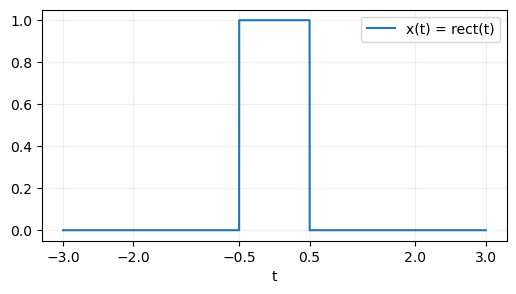

In [3]:
x = np.linspace(-3, 3, 100000)
rect = np.array([1 if np.abs(i) < 1/2 else 0 for i in x])

plt.plot(x, rect, label='x(t) = rect(t)')
plt.legend()
plt.xlabel('t')
plt.gca().set_xticks(np.array([-3,-2,-1/2,1/2,2,3]))
plt.gcf().set_size_inches(6, 3)
plt.grid(alpha=0.2)
plt.show()

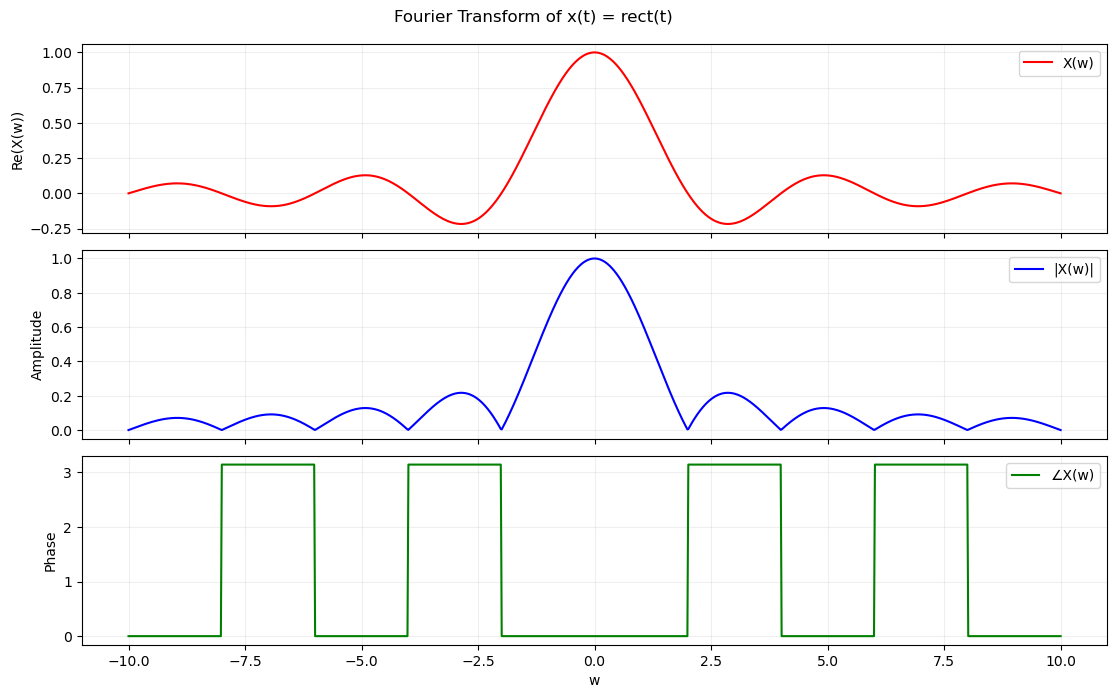

In [4]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(7, 8))


omega = np.linspace(-10, 10, 1000)

amp = np.abs(np.sinc(omega/2))
phase = np.angle(np.sinc(omega/2))


ax1.plot(omega, np.sinc(omega/2), label='X(w)', color='r')
ax1.set_ylabel('Re(X(w))')
ax1.grid(alpha=0.2)
ax1.legend()

ax2.plot(omega, amp, label='|X(w)|', color='b')
ax2.set_ylabel('Amplitude')
ax2.grid(alpha=0.2)
ax2.legend()

# Plot sinc(t) in the second subplot
ax3.plot(omega, phase, label='∠X(w)', color='g')
ax3.set_xlabel('w')
ax3.set_ylabel('Phase')
ax3.grid(alpha=0.2)
ax3.legend()

# Adjust layout to prevent label overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at top for suptitle
plt.suptitle('Fourier Transform of x(t) = rect(t)')
plt.gcf().set_size_inches(12, 7)  # Make the figure wider
plt.show()

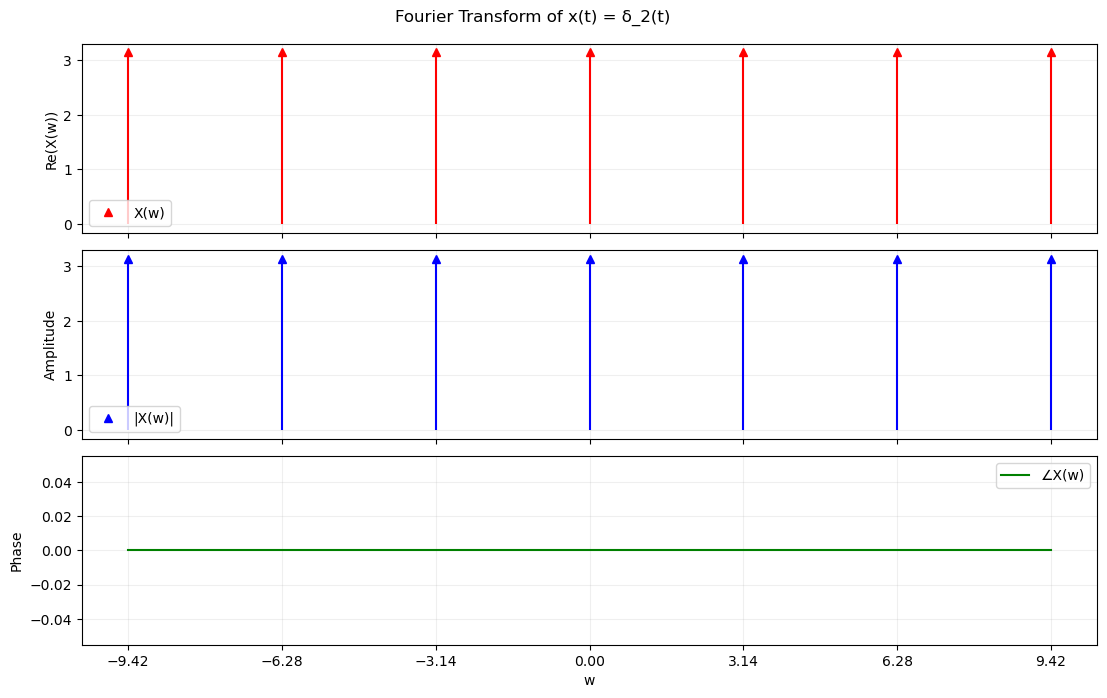

In [5]:
# Plot impulse train using dots
fig, (ax3, ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(7, 8))

# Create impulse train data
t = np.linspace(-3*np.pi, 3*np.pi, 7)
impulse_train = np.zeros_like(t)
period = np.pi
pies = np.array([-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi])
impulse_positions = pies
for pos in impulse_positions:
    idx = np.abs(t - pos).argmin()
    impulse_train[idx] = 1

omega = np.linspace(-3*np.pi, 3*np.pi, 7)
amp = np.pi * impulse_train
ax3.vlines(omega[amp>0], 0, amp[amp >0], 'r', linestyles='solid')
ax3.plot(omega[amp>0], amp[amp > 0], 'r^', markersize=6, label='X(w)')
ax3.set_ylabel('Re(X(w))')
ax3.legend()
ax3.grid(alpha=0.2)

ax1.vlines(omega[amp>0], 0, amp[amp >0], 'b', linestyles='solid')
ax1.plot(omega[amp>0], amp[amp > 0], 'b^', markersize=6, label='|X(w)|')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(alpha=0.2)

# Plot sinc(t) in the second subplot
ax2.plot(omega, np.zeros(len(omega)), label='∠X(w)', color='g')
ax2.set_xlabel('w')
ax2.set_ylabel('Phase')
ax2.legend()
ax2.grid(alpha=0.2)

# Adjust layout to prevent label overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at top for suptitle
plt.suptitle('Fourier Transform of x(t) = δ_2(t)')
plt.gcf().set_size_inches(12, 7)  # Make the figure wider
plt.xticks(pies)
plt.show()

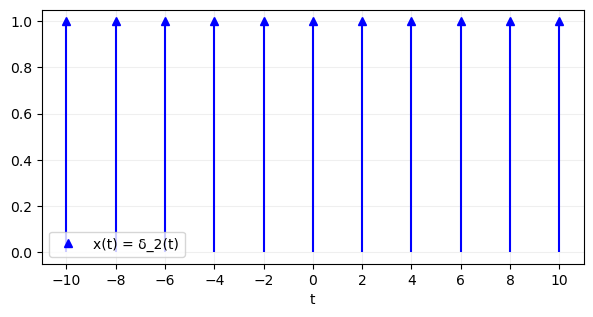

In [6]:
# Create impulse train data
t = np.linspace(-10, 10, 21)
impulse_train = np.zeros_like(t)
period = 2
impulse_positions = np.arange(-10, 11, period)
for pos in impulse_positions:
    idx = np.abs(t - pos).argmin()
    impulse_train[idx] = 1

# Plot impulse train
# Plot vertical lines from x-axis to impulse points
plt.vlines(t[impulse_train==1], 0, impulse_train[impulse_train==1], 'b', linestyles='solid')
# Plot arrows at impulse points
plt.plot(t[impulse_train==1], impulse_train[impulse_train==1], 'b^', markersize=6, label='x(t) = δ_2(t)')
plt.xlabel('t')
plt.xticks(np.arange(-10, 11, 2))
plt.legend()
plt.tight_layout()  # Leave space at top for suptitle
plt.gcf().set_size_inches(6, 3)
plt.grid(alpha=0.2)
plt.show()


/tmp/ipykernel_3551/2523371213.py:29: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g." (-> color='g'). The keyword argument will take precedence.
  ax2.plot(omega[X!=0], np.angle(X)[X!=0],'g.', label='∠X(w)', color='g')


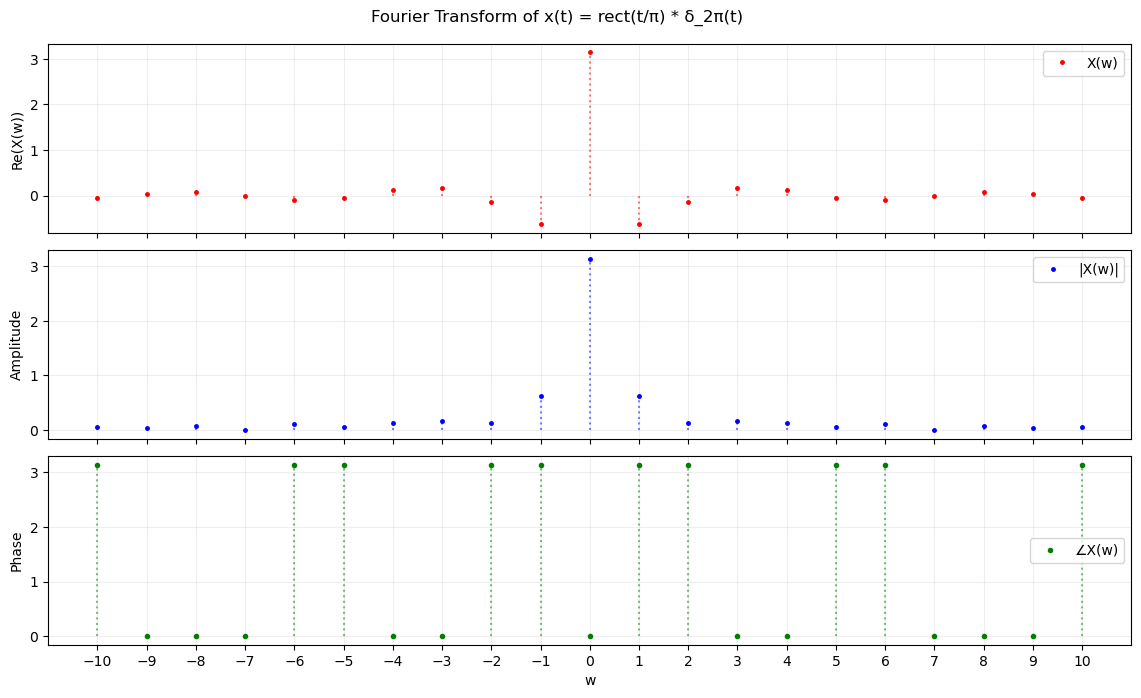

In [7]:
fig, (ax3,ax1, ax2) = plt.subplots(3, 1, sharex=True, figsize=(7, 8))



omega = np.linspace(-10, 10, 21)

impulse_train = np.zeros_like(omega)
period = 1
impulse_positions = np.arange(-10, 11, period)
for pos in impulse_positions:
    idx = np.abs(omega - pos).argmin()
    impulse_train[idx] = 1

X = (np.pi * np.sinc((omega*np.pi) / 2)) * impulse_train
# ax1.vlines(omega[amp > 0],0, amp[amp > 0], 'b', linestyles='solid')
# ax1.plot(omega[amp>0], amp[amp > 0],'b^',markersize=5, label='|X(w)|')
ax3.vlines(omega[X!=0],0, X[X!=0], 'r', linestyles='dotted', alpha=0.5)
ax3.plot(omega[X!=0], X[X!=0],'r.',markersize=5, label='X(w)')
ax3.set_ylabel('Re(X(w))')
ax3.legend()

ax1.vlines(omega[X!=0],0, np.abs(X)[X!=0], 'b', linestyles='dotted', alpha=0.5)
ax1.plot(omega[X!=0], np.abs(X)[X!=0],'b.',markersize=5, label='|X(w)|')
ax1.set_ylabel('Amplitude')
ax1.legend()
# Set marker size to make points less prominent
# Plot sinc(t) in the second subplot
ax2.vlines(omega[X!=0],0, np.angle(X)[X!=0], 'g', linestyles='dotted', alpha=0.5)
ax2.plot(omega[X!=0], np.angle(X)[X!=0],'g.', label='∠X(w)', color='g')
ax2.set_xlabel('w')
ax2.set_ylabel('Phase')
ax2.legend()

# Adjust layout to prevent label overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at top for suptitle
plt.suptitle('Fourier Transform of x(t) = rect(t/π) * δ_2π(t)')
plt.gcf().set_size_inches(12, 7)  # Make the figure wider
plt.xticks(np.arange(-10, 11, 1))
ax1.grid(alpha=0.2)
ax2.grid(alpha=0.2)
ax3.grid(alpha=0.2)
plt.show()

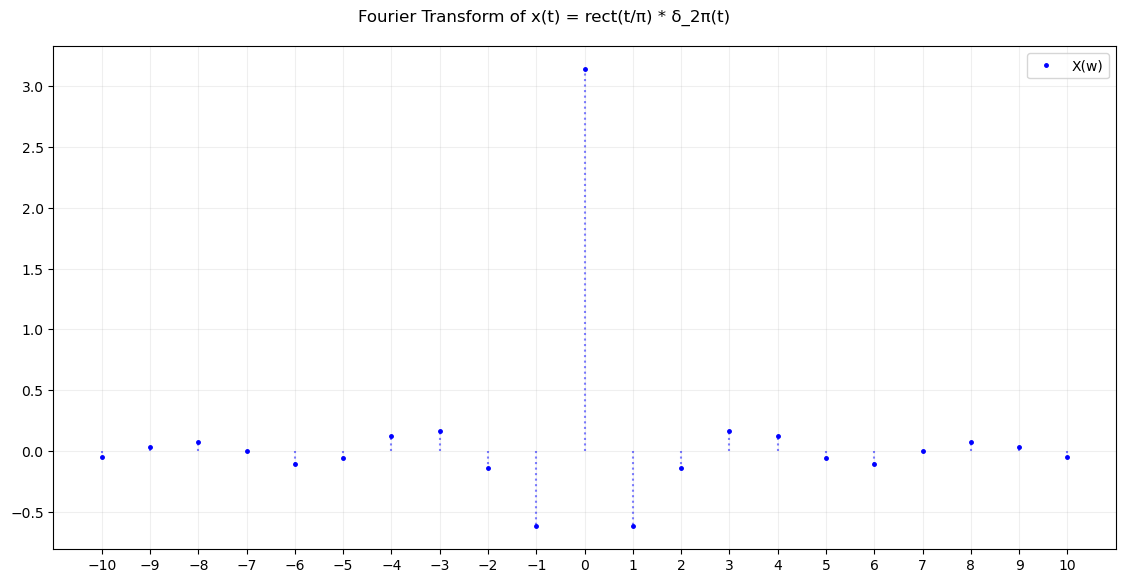

In [8]:
plt.vlines(omega[X!=0],0, X[X!=0], 'b', linestyles='dotted', alpha=0.5)
plt.plot(omega[X!=0], X[X!=0],'b.',markersize=5, label='X(w)')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at top for suptitle
plt.suptitle('Fourier Transform of x(t) = rect(t/π) * δ_2π(t)')
plt.gcf().set_size_inches(12, 6)  # Make the figure wider
plt.xticks(np.arange(-10, 11, 1))
plt.legend()
plt.grid(alpha=0.2)
plt.show()

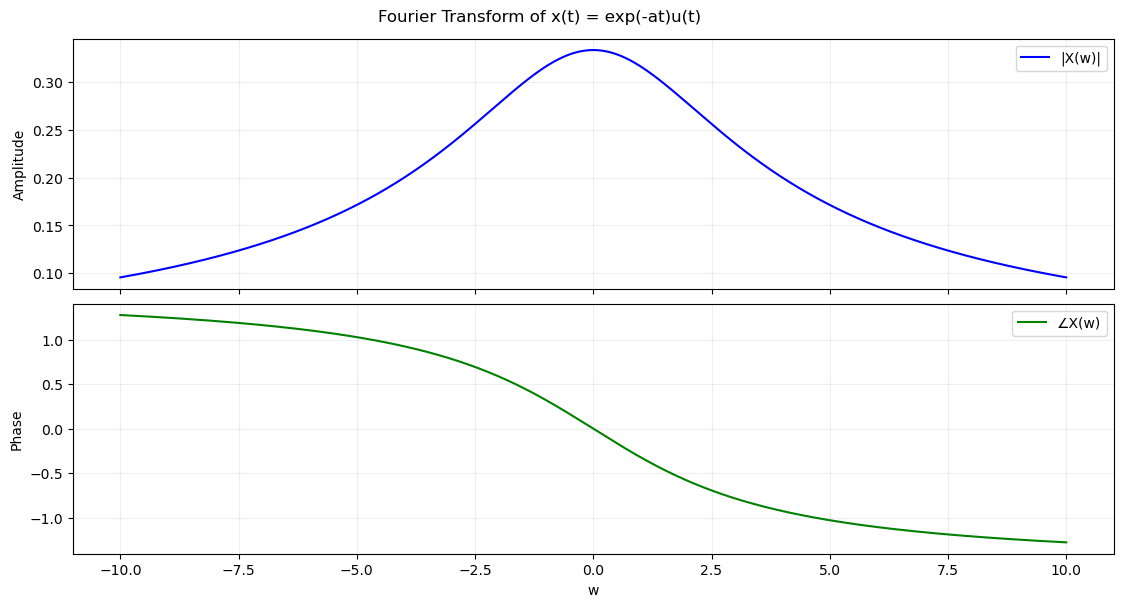

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 8))


omega = np.linspace(-10, 10, 100000)
a = 3

amp = 1/ np.sqrt((np.power(a,2) + np.power(omega,2)))
phase = -np.arctan(omega/a)

ax1.plot(omega, amp, label='|X(w)|', color='b')
ax1.set_ylabel('Amplitude')
ax1.legend()
ax1.grid(alpha=0.2)

# Plot sinc(t) in the second subplot
ax2.plot(omega, phase, label='∠X(w)', color='g')
ax2.set_xlabel('w')
ax2.set_ylabel('Phase')
ax2.legend()
ax2.grid(alpha=0.2)

# Adjust layout to prevent label overlap
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space at top for suptitle
plt.suptitle('Fourier Transform of x(t) = exp(-at)u(t)')
plt.gcf().set_size_inches(12, 6)  # Make the figure wider
plt.show()